----
#**Neural Network: Theory Tutorial**

----

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/content/Churn_Modelling.csv')

In [3]:
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [4]:
df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

#**Data Preprocessing**

Required Columns

In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [6]:
df.drop(['RowNumber', 'CustomerId', 'Surname'], axis = 1, inplace = True)

In [7]:
df.columns

Index(['CreditScore', 'Geography', 'Gender', 'Age', 'Tenure', 'Balance',
       'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary',
       'Exited'],
      dtype='object')

In [8]:
df

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
...,...,...,...,...,...,...,...,...,...,...,...
9995,771,France,Male,39,5,0.00,2,1,0,96270.64,0
9996,516,France,Male,35,10,57369.61,1,1,1,101699.77,0
9997,709,France,Female,36,7,0.00,1,0,1,42085.58,1
9998,772,Germany,Male,42,3,75075.31,2,1,0,92888.52,1


Exploratory Data Analysis

In [9]:
df_group_exit = df.groupby(by = ['Exited', 'Gender']).count()

In [10]:
df_group_exit

CreditScore  Geography   Age  Tenure  Balance  NumOfProducts  \
Exited Gender                                                                 
0      Female         3404       3404  3404    3404     3404           3404   
       Male           4559       4559  4559    4559     4559           4559   
1      Female         1139       1139  1139    1139     1139           1139   
       Male            898        898   898     898      898            898   

               HasCrCard  IsActiveMember  EstimatedSalary  
Exited Gender                                              
0      Female       3404            3404             3404  
       Male         4559            4559             4559  
1      Female       1139            1139             1139  
       Male          898             898              898

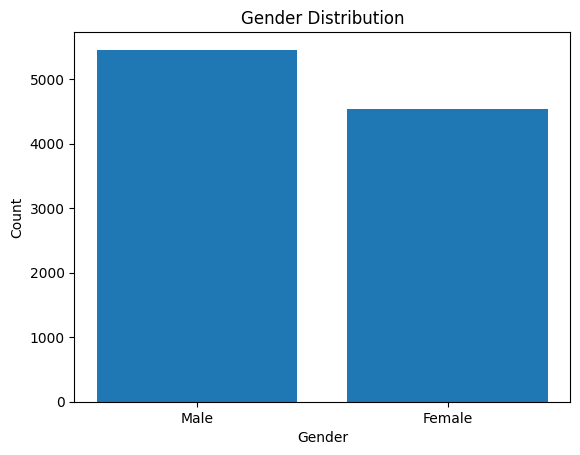

In [11]:
gender_counts = df['Gender'].value_counts()

plt.bar(gender_counts.index, gender_counts.values)
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

In [12]:
print(gender_counts)

Male      5457
Female    4543
Name: Gender, dtype: int64


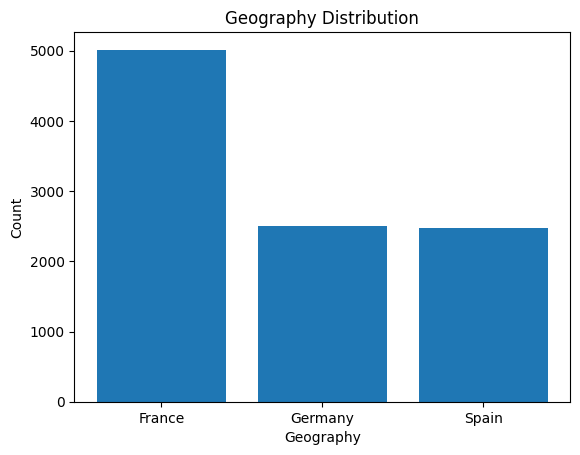

In [13]:
geography_counts = df['Geography'].value_counts()

plt.bar(geography_counts.index, geography_counts.values)
plt.xlabel('Geography')
plt.ylabel('Count')
plt.title('Geography Distribution')
plt.show()

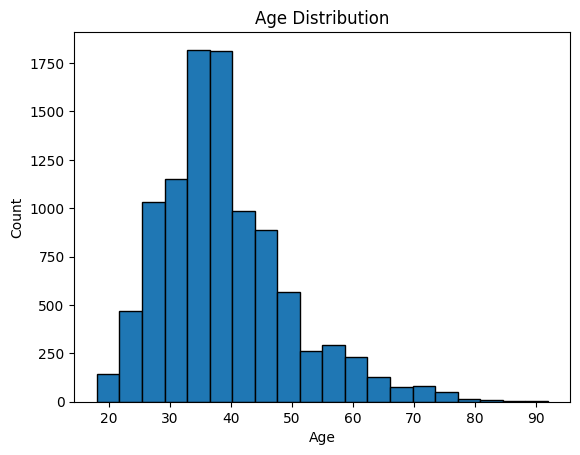

In [14]:
plt.hist(df['Age'], bins=20, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

<ipython-input-15-6cd24a34438e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


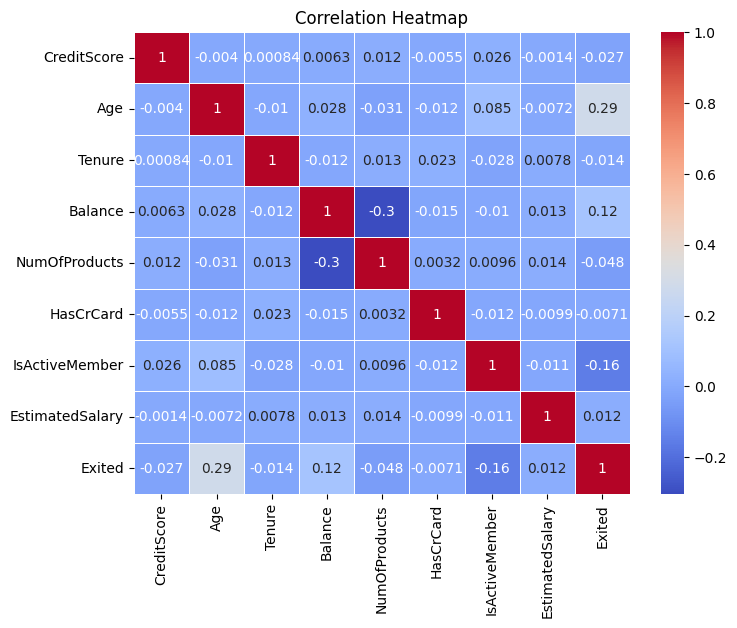

In [15]:
import seaborn as sns
corr_matrix = df.corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Correlation Heatmap')
plt.show()

----

#**Part 1: Data Preprocessing**

----

In [16]:
X = df.iloc[:,:-1].values
y = df.iloc[:, -1].values

In [17]:
df.head(3)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,502,France,Female,42,8,159660.80,3,1,0,113931.57,1


In [18]:
X[1]

array([608, 'Spain', 'Female', 41, 1, 83807.86, 1, 0, 1, 112542.58],
      dtype=object)


#**Categorial Data Encoding**


Label Encoder - 'Gender'

In [19]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

One Hot Encoder - 'Geography'

In [20]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

ct = ColumnTransformer(transformers = [('encoder', OneHotEncoder(), [1])], remainder = 'passthrough')
X = np.array(ct.fit_transform(X))

#**Split into Training Dataset & Testing DataSet**


In [21]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

#**Feature Selection**

In [22]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [23]:
X_train

array([[-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
        -1.03227043,  1.10643166],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
         0.9687384 , -0.74866447],
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.48533467],
       ...,
       [ 0.98560362, -0.5698444 , -0.57369368, ...,  0.64259497,
        -1.03227043,  1.41231994],
       [-1.01460667, -0.5698444 ,  1.74309049, ...,  0.64259497,
         0.9687384 ,  0.84432121],
       [-1.01460667,  1.75486502, -0.57369368, ...,  0.64259497,
        -1.03227043,  0.32472465]])

----
#**Part II: Artificial Neural Network**

----

TensorFlow

In [24]:
import tensorflow as tf

In [25]:
tf.__version__

'2.13.0'

----
#**Building Artifical Neural Network**

----

Initializing Artificial Neural Network:

*This line initializes an artificial neural network model. The model is created as a sequence of layers, and you can add layers to it one by one using the add method.*

In [26]:
ann = tf.keras.models.Sequential()      # Initialization of the model.

#Adding First Hidden Layer

*This line adds the first hidden layer to the neural network. It's a fully connected (dense) layer with 6 units (neurons) and uses the ReLU (Rectified Linear Unit) activation function.*

*The ReLU activation function is commonly used in hidden layers of neural networks to introduce non-linearity.*

In [27]:
ann.add(tf.keras.layers.Dense(units= 100, activation = 'relu'))

#Adding Second Hidden Layer

*This line adds the second hidden layer, which is also a fully connected layer with 6 units and ReLU activation.*

*You can have multiple hidden layers to allow the network to learn complex patterns from the data.*

In [28]:
ann.add(tf.keras.layers.Dense(units= 100, activation = 'relu'))

In [29]:
## Test Only ##

#ann.add(tf.keras.layers.Dense(units= 6, activation = 'sigmoid'))

#Adding Third Layer - Output Layer

*This line adds the third layer, which is the output layer. It has a single unit and uses the sigmoid activation function. In this case, it appears to be a binary classification problem, where the network is being used to make binary predictions (0 or 1).*



*The sigmoid activation function is commonly used in the output layer for binary classification problems as it squashes the output between 0 and 1, representing the probability of being in class 1.*

In [30]:
ann.add(tf.keras.layers.Dense(units= 1, activation = 'sigmoid'))

In [31]:
## Test Only ##
#ann.add(tf.keras.layers.Dense(units= 1, activation = 'relu'))

#Compile ANN

*This line compiles the artificial neural network. Here's what each parameter means:*


*   optimizer='adam': *This specifies the optimization algorithm used to update the weights of the network during training. 'Adam' is a popular optimization algorithm that is suitable for many problems.*

*   loss='binary_crossentropy': *This is the loss function used to measure the error between the predicted output and the actual target values. For binary classification problems, 'binary_crossentropy' is commonly used.*

*   metrics=['accuracy']: *This parameter specifies the evaluation metric to be used during training. In this case, it uses 'accuracy,' which measures how well the model is performing based on the proportion of correctly classified examples.*




In [32]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

----
#**Training the Artificial Neural Network on the Training Set**


*This line trains the artificial neural network on the training data. Here's what each parameter means:*

*   batch_size=32: *This parameter specifies the number of samples used in each iteration of training. The training dataset is divided into batches, and in each epoch (cycle through the entire dataset), the model is updated with these mini-batches.*

*   epochs=15: *This parameter specifies how many times the neural network should go through the entire training dataset. In this case, it will train for 15 epochs, each time iterating over the dataset in mini-batches.*




In [33]:
ann.fit(X_train, y_train, batch_size = 32, epochs = 25)

Epoch 1/25
250/250 [==============================] - 3s 5ms/step - loss: 0.4334 - accuracy: 0.8176
Epoch 2/25
250/250 [==============================] - 1s 4ms/step - loss: 0.3635 - accuracy: 0.8512
Epoch 3/25
250/250 [==============================] - 1s 3ms/step - loss: 0.3465 - accuracy: 0.8580
Epoch 4/25
250/250 [==============================] - 1s 3ms/step - loss: 0.3417 - accuracy: 0.8601
Epoch 5/25
250/250 [==============================] - 2s 7ms/step - loss: 0.3362 - accuracy: 0.8604
Epoch 6/25
250/250 [==============================] - 1s 6ms/step - loss: 0.3317 - accuracy: 0.8634
Epoch 7/25
250/250 [==============================] - 1s 4ms/step - loss: 0.3290 - accuracy: 0.8660
Epoch 8/25
250/250 [==============================] - 1s 4ms/step - loss: 0.3245 - accuracy: 0.8683
Epoch 9/25
250/250 [==============================] - 1s 5ms/step - loss: 0.3244 - accuracy: 0.8640
Epoch 10/25
250/250 [==============================] - 1s 4ms/step - loss: 0.3216 - accuracy: 0.8676

****
#**Activation Functions**

1. **Step Function:** This is one of the simplest activation functions. It outputs 1 if the input is greater than or equal to a threshold, and 0 otherwise. However, it's rarely used in modern neural networks because it lacks the ability to learn complex patterns.

2. **Sigmoid Function:** The sigmoid activation function squashes the input to a range between 0 and 1. It's commonly used in the output layer of binary classification models to represent probabilities.
        ann.add(tf.keras.layers.Dense(units= 6, activation = 'sigmoid'))

3. **Hyperbolic Tangent (Tanh) Function:** Tanh is similar to the sigmoid function but squashes the input to a range between -1 and 1. It's often used in hidden layers and has the advantage of being zero-centered, which can help with training stability.

4. **Rectified Linear Unit (ReLU):** ReLU is one of the most popular activation functions. It outputs the input if it's positive and 0 if it's negative. ReLU is computationally efficient and helps with training deep neural networks. However, it can suffer from a problem called "dying ReLU" when neurons output 0 and stop learning.

5. **Leaky Rectified Linear Unit (Leaky ReLU):** Leaky ReLU is a variant of ReLU that allows a small, non-zero gradient for negative inputs. This addresses the dying ReLU problem by allowing some learning in neurons with negative values.

6. **Parametric Rectified Linear Unit (PReLU):** PReLU is similar to Leaky ReLU but allows the slope of the negative part to be learned during training. This makes it more flexible than Leaky ReLU.

7. **Exponential Linear Unit (ELU):** ELU is another variant of ReLU that tries to address some of its shortcomings. It smoothly handles negative values and has a saturating range for very negative inputs.

8. **Scaled Exponential Linear Unit (SELU):** SELU is a self-normalizing activation function. It has been shown to encourage the self-normalization of neural networks, making them more stable during training.

9. **Swish:** Swish is a recent activation function that has shown promise in some experiments. It is a smooth, non-monotonic function that is differentiable, making it suitable for gradient-based optimization.

10. **Gated Recurrent Unit (GRU) and Long Short-Term Memory (LSTM):** While not traditional activation functions, GRU and LSTM are specialized units used in recurrent neural networks for sequential data. They have gating mechanisms to control the flow of information.

****
